In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime


import collections


In [2]:
geotuscany 

NameError: name 'geotuscany' is not defined

In [161]:
G = nx.read_graphml('../data/clean/byuser.graphml',node_type=int)
print(len(G),len(G.edges))
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[3400:3403]: print(G.edges[node])

9107 111741
{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
{'start': 194, 'end': 195, 'user': '864matteob', 'days': 1, 'geodistance': 0.00038607771238617113}
{'start': 174, 'end': 180, 'user': 'Alberto B 221212750', 'days': 6, 'geodistance': 1.0405507588585021}
{'start': 176, 'end': 180, 'user': 'moncina74', 'days': 4, 'geodistance': 1.0405507588585021}


In [163]:
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[3400:3403]: print(node,G.edges[node])

{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
(13743, 1076, 0) {'start': 194, 'end': 195, 'user': '864matteob', 'days': 1, 'geodistance': 0.00038607771238617113}
(13743, 3848, 0) {'start': 174, 'end': 180, 'user': 'Alberto B 221212750', 'days': 6, 'geodistance': 1.0405507588585021}
(13743, 3848, 1) {'start': 176, 'end': 180, 'user': 'moncina74', 'days': 4, 'geodistance': 1.0405507588585021}


In [4]:
df = pd.read_csv('../data/clean/covidars.csv',index_col='index')
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
index,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,22920,626.0,8972,180.0,13289,523.0,13770,327.0,24567,662.0
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,22933,626.0,8988,180.0,13292,523.0,13784,327.0,24578,662.0
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,22938,626.0,9010,180.0,13296,523.0,13801,328.0,24591,662.0


In [5]:
provinceTags = ['PI','PO','LI','FI','AR','PT','GR','MS','SI','LU']
provinces = ['pisa','prato','livorno','florence','arezzo','pistoia','grosseto','massacarrara','siena','lucca']

In [6]:

for province in provinceTags:

    lagged = list(df[province+'-positivi'])
    lagged.insert(0,0)
    lagged.pop(-1)

    df[province+'-new_positivi'] = df[province+'-positivi'] - pd.Series(lagged,index=df.index) 
    df[province+'-new_positivi'].replace([i for i in df[province+'-'+'new_positivi'] if i<0],0,inplace=True)
    
        
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,...,14,18,17,44,14,15,27,4,8,13
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,...,20,24,9,28,8,13,16,3,14,11
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,...,9,18,8,37,13,5,22,4,17,13


In [7]:
DF =df.copy()
df = df[0:432]


In [8]:
DF.to_csv('../data/covidarsNotCumulative.csv')

In [9]:
tickslocs = []
tickslabels = []
for i,e in enumerate(df.index):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2020-02-14',
 '2020-04-02',
 '2020-05-20',
 '2020-07-07',
 '2020-08-24',
 '2020-10-11',
 '2020-11-28',
 '2021-01-15',
 '2021-03-04',
 '2021-04-20']

In [10]:
df.reset_index(inplace=True)
df

,index,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
0,2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,...,0,0,0,1,0,1,0,0,0,0
2,2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,...,91,87,52,224,80,61,13,27,42,60
428,2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,...,71,77,27,127,41,74,17,31,31,26
429,2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,...,68,80,42,249,99,98,27,47,67,70
430,2021-04-19,27662,652.0,20519,505.0,16537,393.0,62004,1968.0,20808,...,127,109,57,292,113,124,40,36,68,86


In [11]:
colors = ['brown','red','orange','yellow','green','blue','']

In [75]:
tdf = pd.DataFrame(index = range(0,432), columns = provinceTags)
tdf.fillna(0,inplace=True)
tdf

,PI,PO,LI,FI,AR,PT,GR,MS,SI,LU
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
427,0,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0
430,0,0,0,0,0,0,0,0,0,0


In [76]:
provinceAb = {'PI':416425,'PO':256047,'LI':329590,'FI':986001,'AR':336870,'PT':290819,'GR':218538,'MS':189841,'SI':263526,'LU':380676}

In [77]:
for e,edge in G.edges.items(): 
    u,v,_ = e 
    start = edge['start']
    end = edge['end']
    startProvince = G.nodes[u]['province']
    endProvince = G.nodes[v]['province']

    tdf.loc[end,endProvince] += df.loc[start,startProvince+'-new_positivi'] / (provinceAb[province] )

In [78]:
tdf

,PI,PO,LI,FI,AR,PT,GR,MS,SI,LU
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000011,0.000005,0.000008,0.000496,0.0,0.000003,0.000000,0.000000,0.000000,0.000003
2,0.000000,0.000003,0.000000,0.000376,0.0,0.000016,0.000000,0.000000,0.000003,0.000003
3,0.000000,0.000003,0.000000,0.000026,0.0,0.000016,0.000000,0.000003,0.000000,0.000003
4,0.000047,0.000000,0.000032,0.001910,0.0,0.000016,0.000000,0.000000,0.000047,0.000000
...,...,...,...,...,...,...,...,...,...,...
427,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000050
428,0.000000,0.000016,0.000000,0.000000,0.0,0.000000,0.000000,0.000229,0.000000,0.000000
429,0.000000,0.001001,0.000000,0.000000,0.0,0.000000,0.000005,0.000147,0.000000,0.000000
430,0.000000,0.000039,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


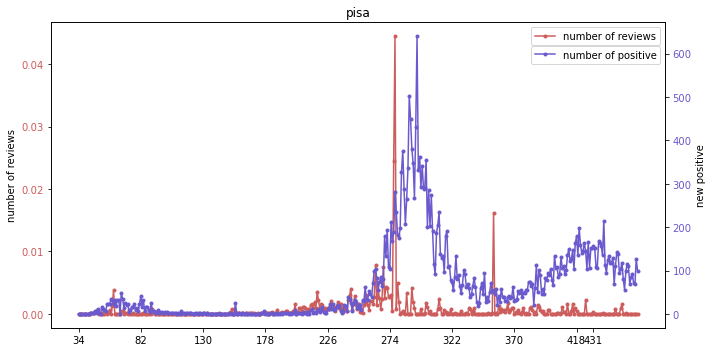

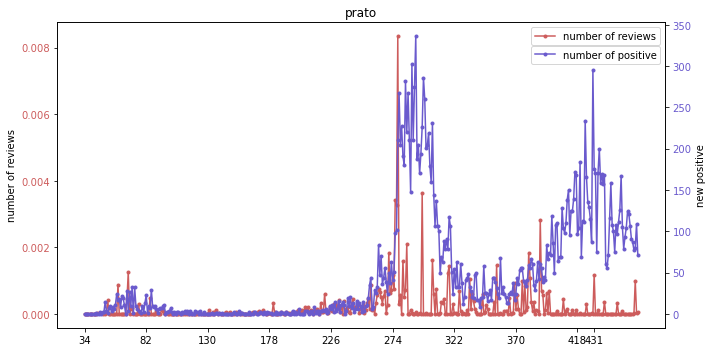

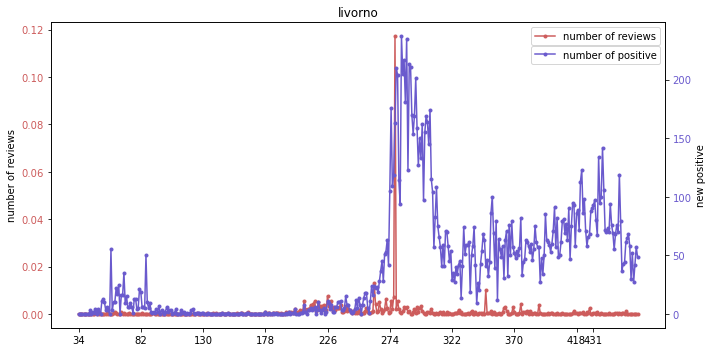

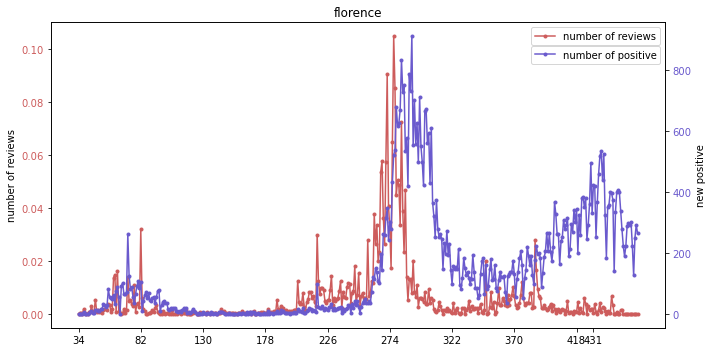

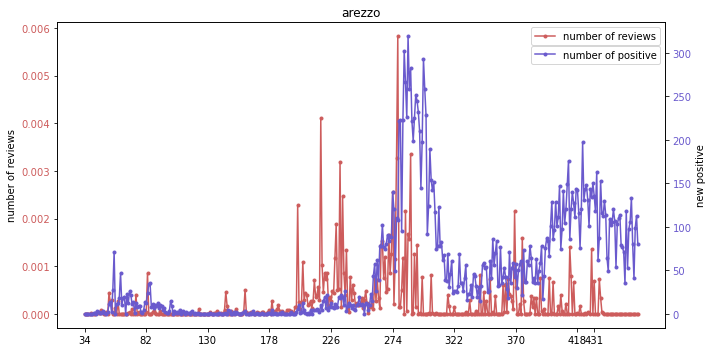

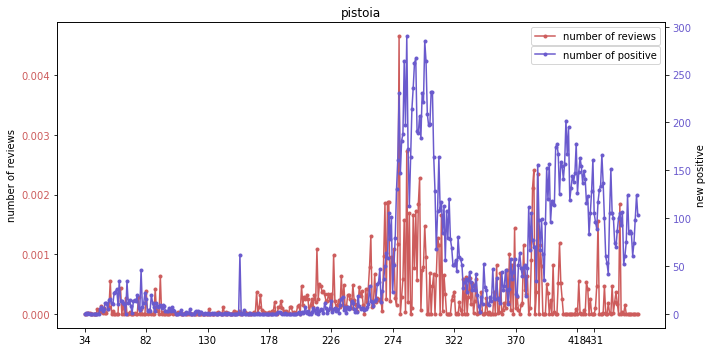

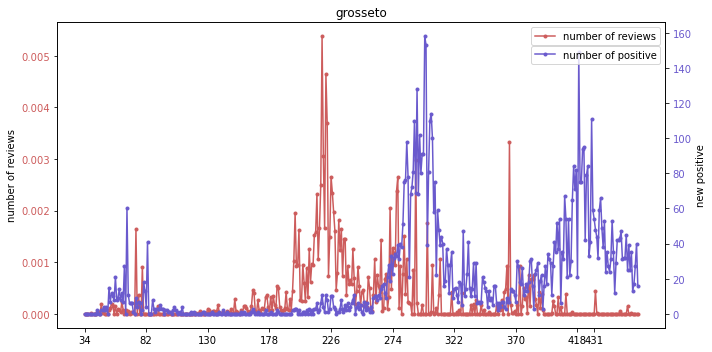

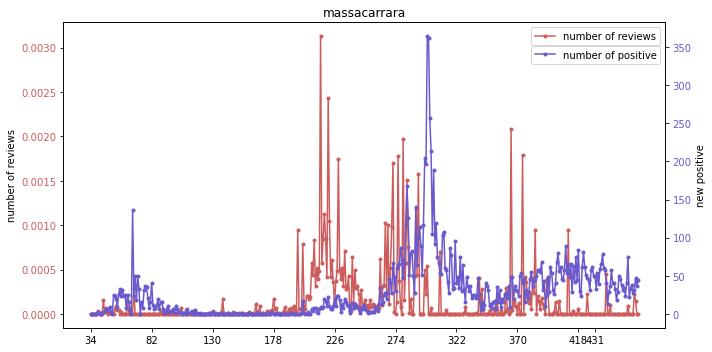

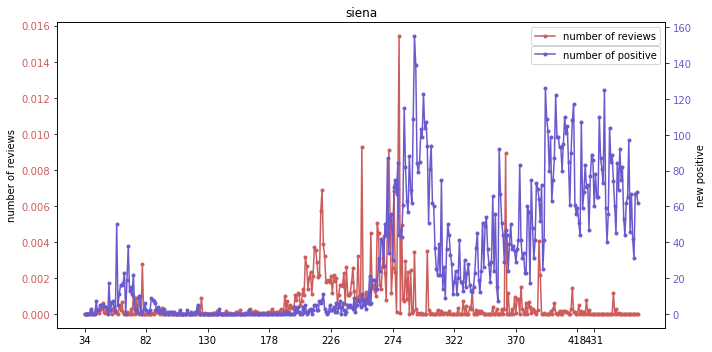

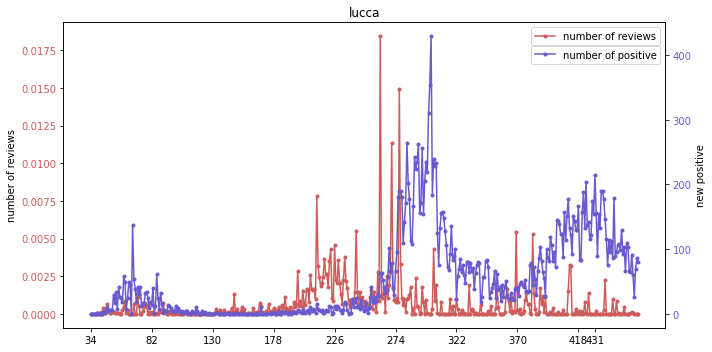

In [79]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ax1.plot(tdf[province],  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
        
    ax2.plot(df[province+'-'+'new_positivi'],c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### ROLLING

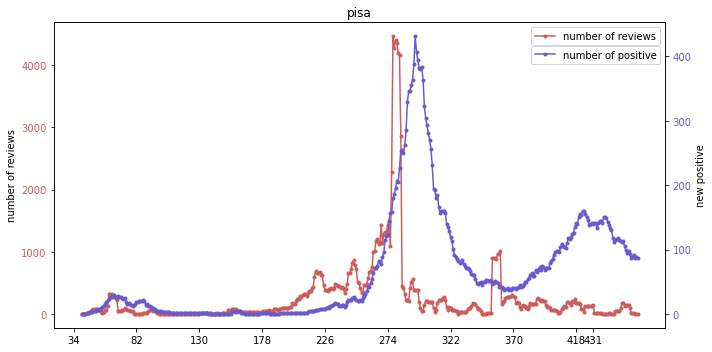

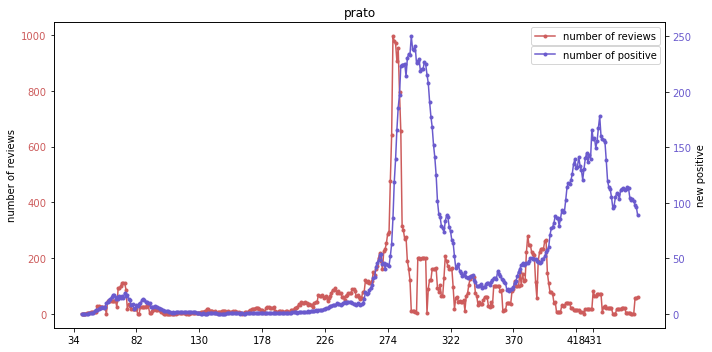

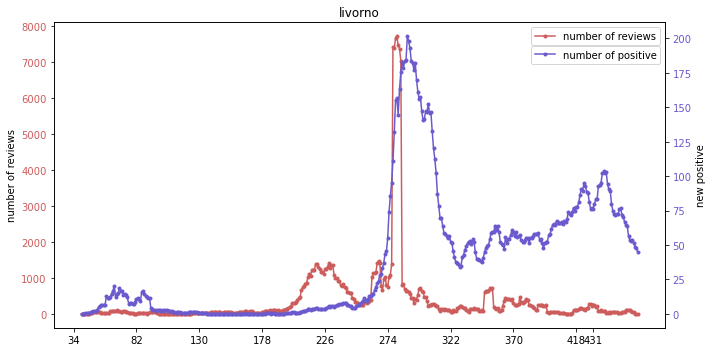

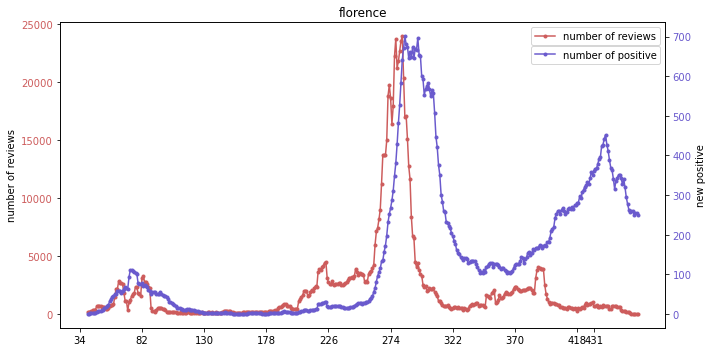

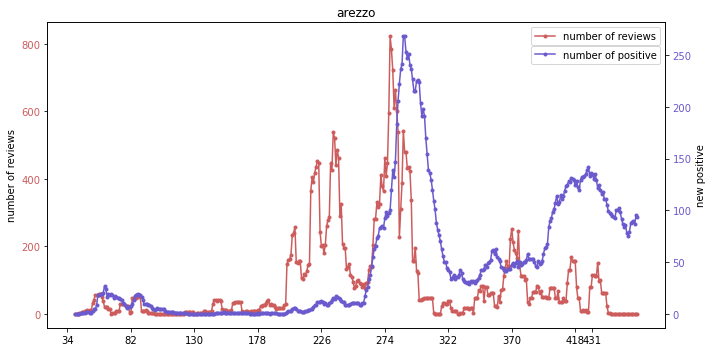

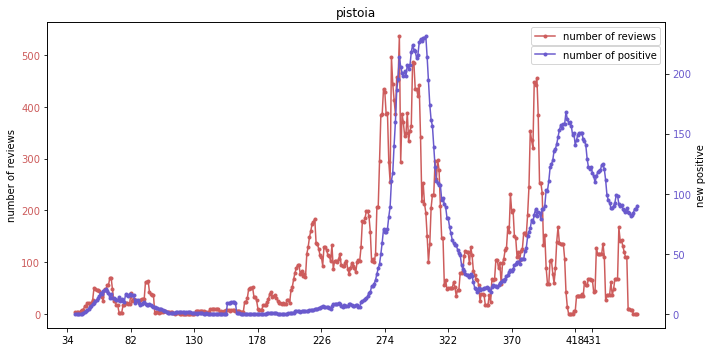

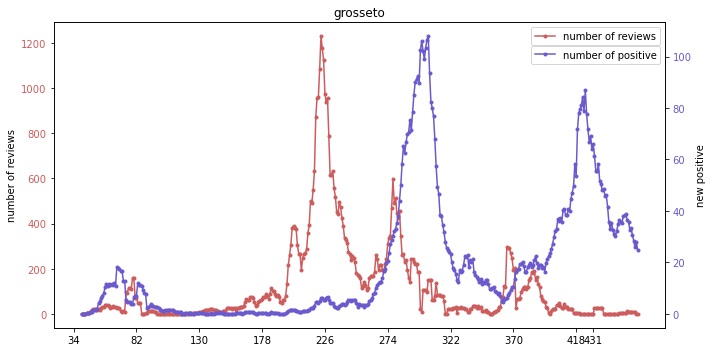

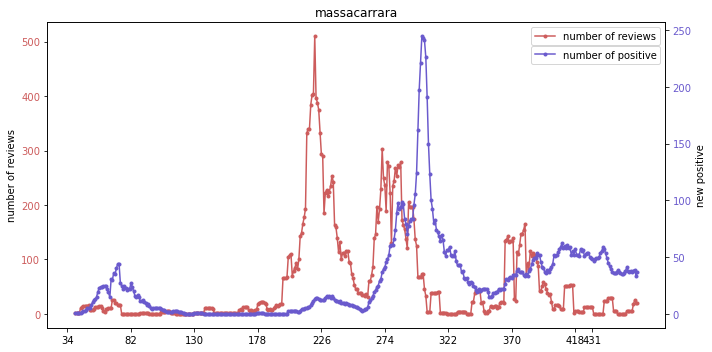

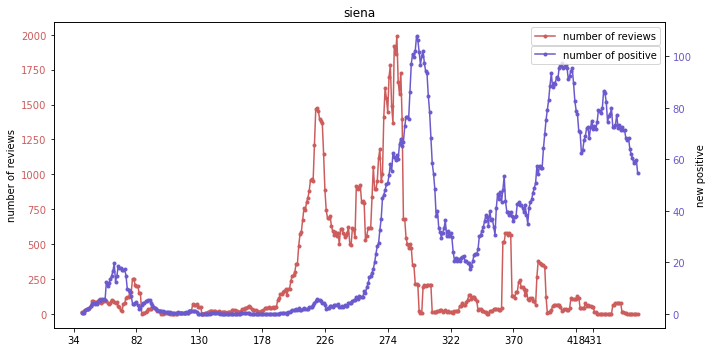

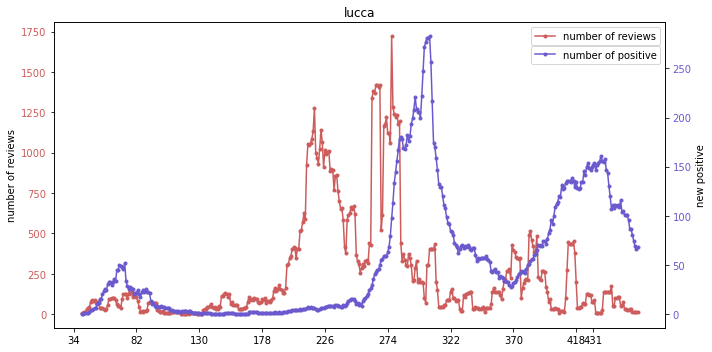

In [51]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ts1 = pd.Series(tdf[province])
    #(ts1 - ts1.mean())/ts1.std()
    counter = (ts1).rolling(window=7).mean()
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
      
    ts2 = df[province+'-'+'new_positivi']
    #(ts2 - ts2.mean())/ts2.std()
    ax2.plot((ts2).rolling(window=7).mean(),c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### MOVING AVERAGE

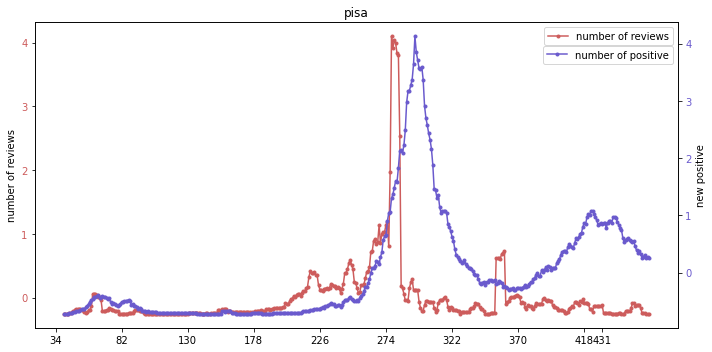

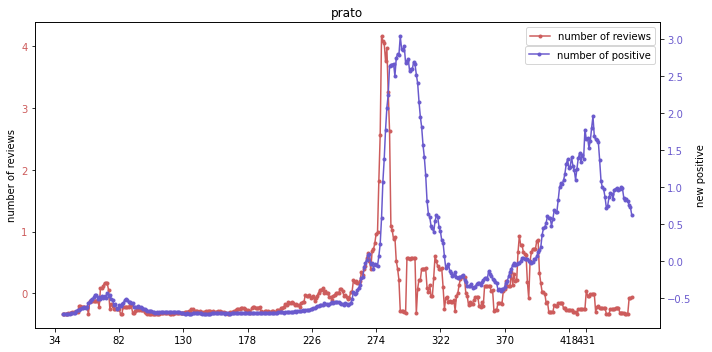

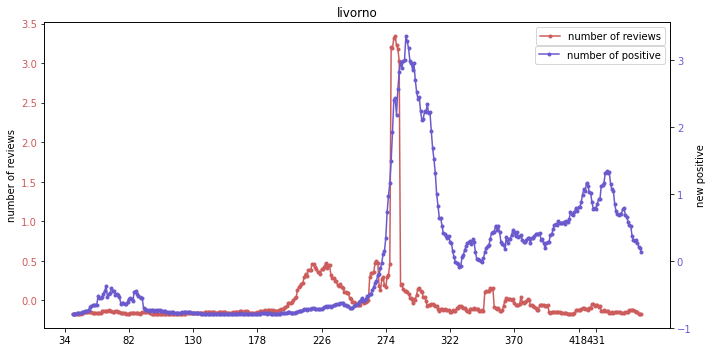

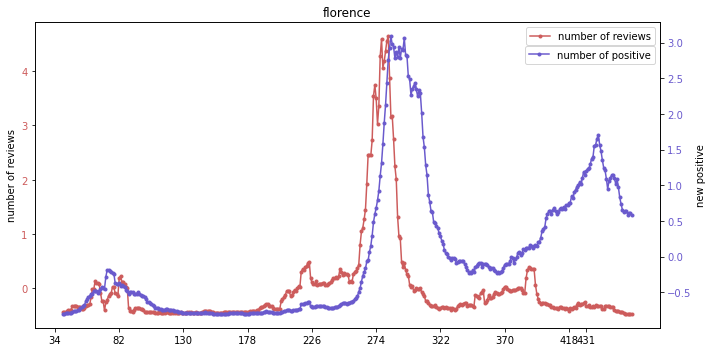

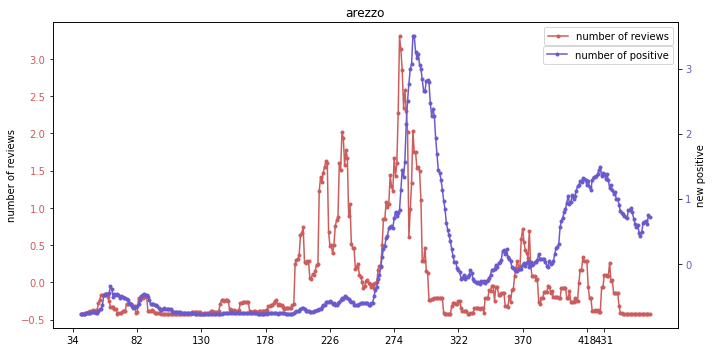

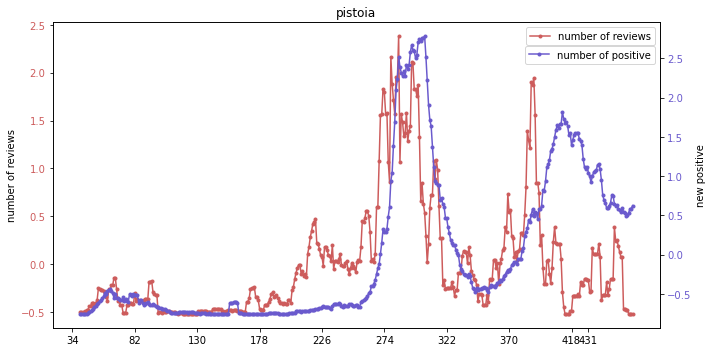

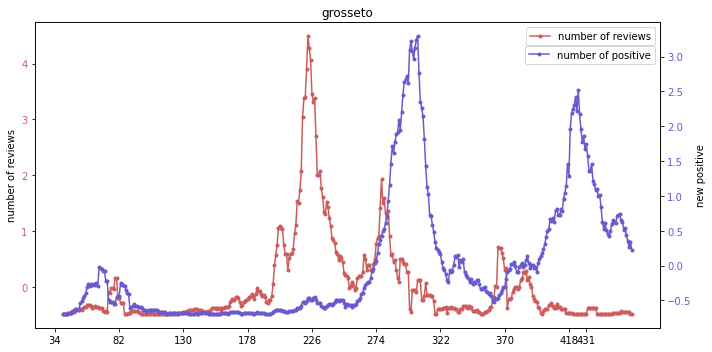

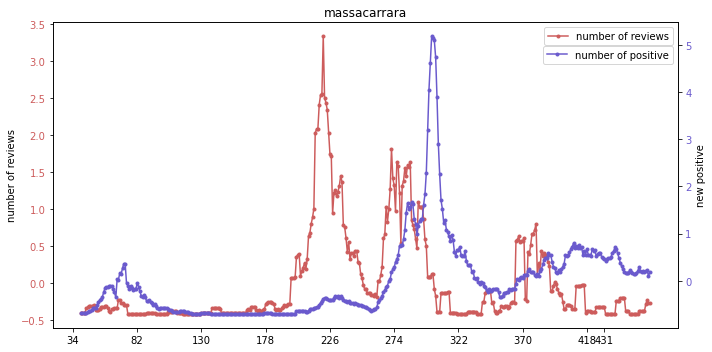

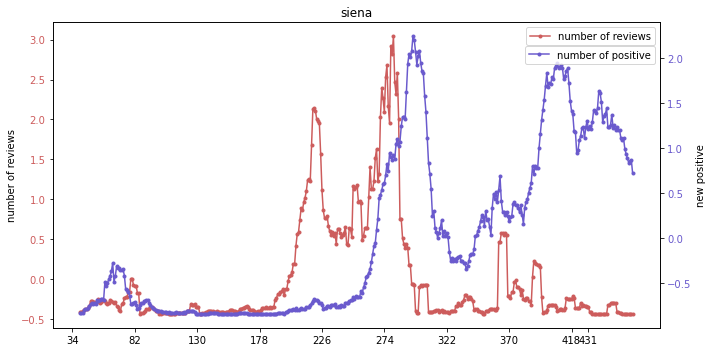

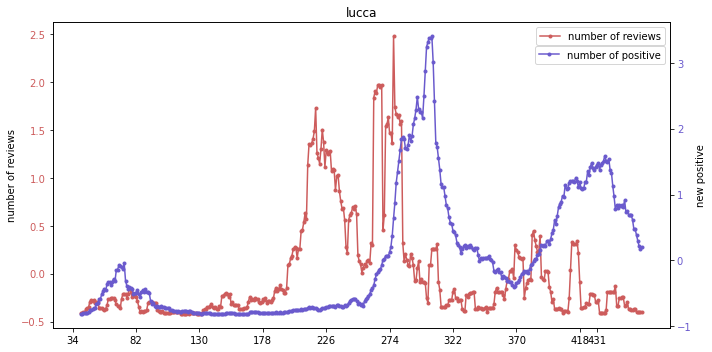

In [52]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
  
    
    c1 = 'indianred'
    c2= 'slateblue'
    ts1 = pd.Series(tdf[province])
    
    counter = ((ts1 - ts1.mean())/ts1.std()).rolling(window=7).mean()
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
      
    ts2 = df[province+'-'+'new_positivi']
    #
    ax2.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=7).mean(),c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

In [81]:
477 -432

45

#### find best lag

In [53]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist, euclidean

In [54]:
ts2 = sum([df[province+'-'+'new_positivi'] for province in provinceTags])

In [55]:
dtw(ts1[6:], ts2[6:])

11023.809278103463

In [56]:
euclidean(ts1[6:], ts2[6:])

18624.58340473687

In [57]:
from scipy.spatial.distance import euclidean, cityblock

distances = []
lags = []

for i, province in enumerate(provinceTags):
    
    
   
    ts1 =tdf[province]
    ts1 = ((ts1 - ts1.mean())/ts1.std()).rolling(window=7).mean()
    ts1 = ts1[6:]
    
    ts2 = df[province+'-'+'new_positivi']
    ts2 = ((ts2 - ts2.mean())/ts2.std()).rolling(window=7).mean()
    ts2 = ts2[6:]
    
    distances.append( cityblock(ts1, ts2)/ len(ts1))
    lags.append(0)
    
    for lag in range(100):
        
        ts1 = ts1[:-1]
        ts2 = ts2[1:]
        
        dist = euclidean(ts1, ts2) / len(ts1)
        if dist  < distances[i]:
            distances[i] = dist
            lags[i] = lag
        
        

In [58]:
print(distances)
print(lags, np.mean(lags))

[0.03528042236335275, 0.03787788174314392, 0.04127380047741225, 0.03440072859011552, 0.039648317960339546, 0.03221396003684871, 0.0417531741193683, 0.03743316974199918, 0.04867444387733858, 0.04299838020165611]
[16, 18, 8, 14, 10, 11, 72, 81, 20, 28] 27.8


In [59]:
print(distances)
print(lags, np.mean(lags))

[0.03528042236335275, 0.03787788174314392, 0.04127380047741225, 0.03440072859011552, 0.039648317960339546, 0.03221396003684871, 0.0417531741193683, 0.03743316974199918, 0.04867444387733858, 0.04299838020165611]
[16, 18, 8, 14, 10, 11, 72, 81, 20, 28] 27.8


In [60]:
bestlag = 28

## Comparation

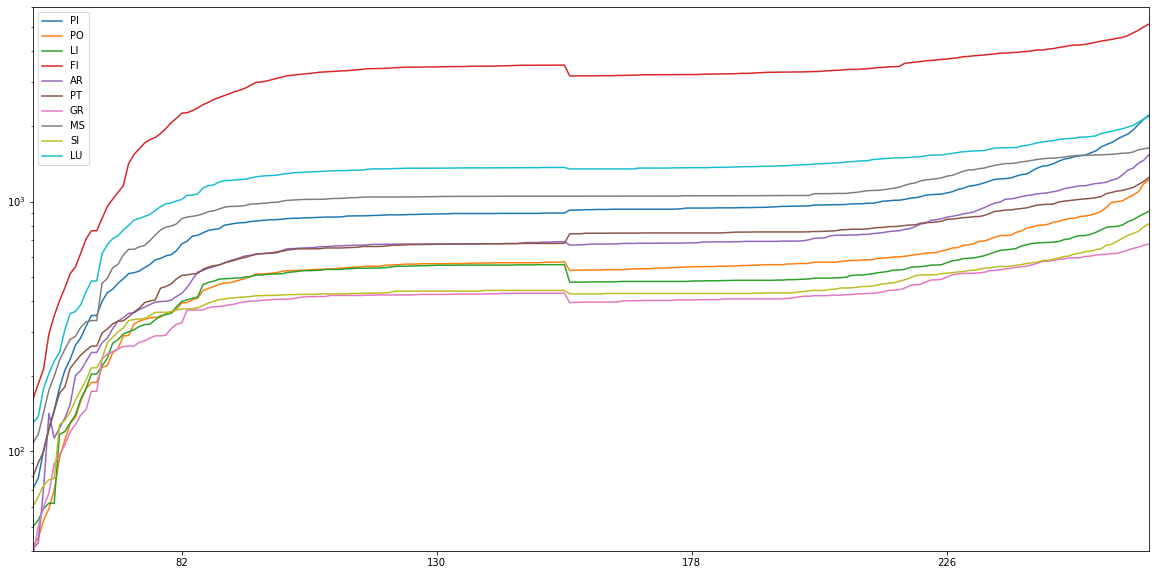

In [61]:
plt.figure(figsize=(20,10))
for p in provinceTags:
    plt.plot(df[p+'-'+'positivi'],label=p)
    
    plt.yscale('log')
    plt.xticks(tickslocs, tickslabels)
    plt.xlim(20,230)
    plt.ylim(40,6000)
plt.legend()

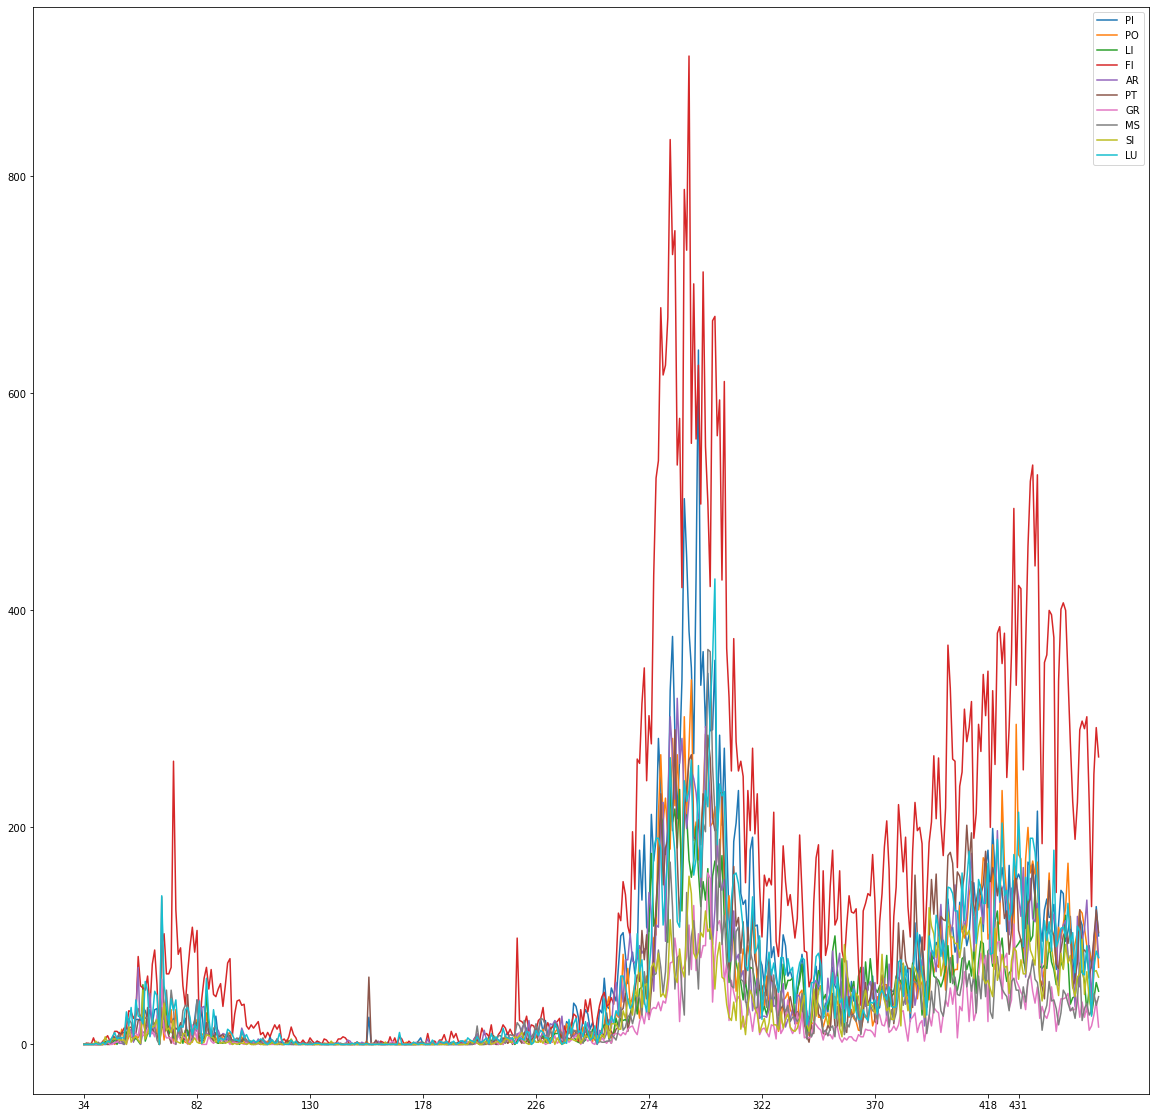

In [62]:
plt.figure(figsize=(20,20))
for p in provinceTags:
    plt.plot(df[p+'-'+'new_positivi'],label=p)
    plt.xticks(tickslocs, tickslabels)
    
plt.legend()

### Random Forest Regression 
Wetry to use reviews to rpedict positives 

In [63]:
bestlag = 28

In [64]:
provinceTags

['PI', 'PO', 'LI', 'FI', 'AR', 'PT', 'GR', 'MS', 'SI', 'LU']

In [65]:
DF

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,...,14,18,17,44,14,15,27,4,8,13
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,...,20,24,9,28,8,13,16,3,14,11
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,...,9,18,8,37,13,5,22,4,17,13


In [89]:
dftest = DF[432-6:432+bestlag ]
dftest

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2021-04-15,27305,644.0,20166,491.0,16359,391.0,61112,1932.0,20475,406.0,...,84,91,30,302,133,84,35,38,67,91
2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,406.0,...,91,87,52,224,80,61,13,27,42,60
2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,407.0,...,71,77,27,127,41,74,17,31,31,26
2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,408.0,...,68,80,42,249,99,98,27,47,67,70
2021-04-19,27662,652.0,20519,505.0,16537,393.0,62004,1968.0,20808,409.0,...,127,109,57,292,113,124,40,36,68,86
2021-04-20,27762,653.0,20590,508.0,16586,393.0,62269,1984.0,20888,410.0,...,100,71,49,265,80,103,16,44,62,80
2021-04-21,27887,656.0,20702,510.0,16645,394.0,62515,1991.0,20951,410.0,...,125,112,59,246,63,80,14,35,81,80
2021-04-22,27972,657.0,20782,512.0,16690,394.0,62695,2003.0,21075,410.0,...,85,80,45,180,124,56,34,21,42,63
2021-04-23,28026,659.0,20815,515.0,16722,396.0,62878,2012.0,21140,410.0,...,54,33,32,183,65,70,9,28,53,43


data preparation

In [137]:
X_trains = []
y_trains = []
X_tests = []
y_tests = []

for province in provinceTags:
    
   
            
        ts1 = pd.Series(tdf[province])
        #(ts1 - ts1.mean())/ts1.std()
        ts1 = (ts1).rolling(window=7).mean()
        ts1 = ts1[6:]
        
        ts2 = df[province+'-'+'new_positivi']
        #(ts2 - ts2.mean())/ts2.std()
        ts2 = (ts2).rolling(window=7).mean()
        ts2 = ts2[6:]
        
      
        
        X_trains.append(ts1[:-bestlag])
        y_trains.append(ts2[bestlag:])
        
        
        ts2 = dftest[province+'-'+'new_positivi']
        #(ts2 - ts2.mean())/ts2.std()
        ts2 = (ts2).rolling(window=7).mean()
        ts2 = ts2[6:]
        
        X_tests.append(ts1[-bestlag:])
        y_tests.append(ts2)
        
        
            

In [138]:
len(y_tests[0])

28

In [139]:
len(y_tests)

10

In [140]:
for y in y_trains: print(np.shape(y))

(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)


In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


    


regr = RandomForestRegressor(max_depth=34, warm_start=True, random_state=0)

for t in range(100):
    for X,y in zip(X_trains,y_trains):
    
        X = np.array(X).reshape(-1,1)
        y = np.array(y).reshape(-1,1)
        
        regr.fit(X, y)

    


    
    







<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators

<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expec

<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-141-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [142]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score




def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [143]:

tickslocs = []
tickslabels = []
for i,e in enumerate(list(y_trains[0].index)):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

[34, 82, 130, 178, 226, 274, 322, 370, 418, 431]

In [144]:
len(y_trains)

10

MAE 61.928
RMSE 88.979
MAD 40.320
R2 -0.925
MAPE 4.030
MAXAPE 185.226
TAPE 1604.044


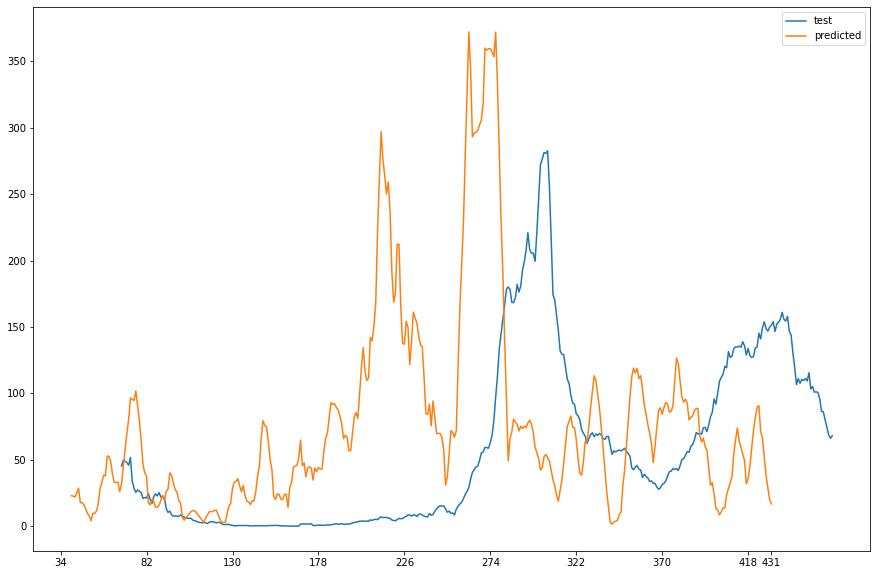

MAE 52.915
RMSE 73.462
MAD 37.420
R2 -0.292
MAPE 1.479
MAXAPE 34.219
TAPE 529.474


In [145]:
X_test = np.array(X_trains[-1]).reshape(-1,1)
y_test =  y_trains[-1]

y_pred = regr.predict(X_test)
for k, v in evaluate(y_test, y_pred).items():
    print('%s %.3f' % (k, v))

y_pred = pd.Series(y_pred).rolling(window=7).mean()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'test')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.xticks(tickslocs, tickslabels)
plt.show()


for k, v in evaluate(y_test[6:], y_pred[6:]).items():
    print('%s %.3f' % (k, v))



MAE 65.296
RMSE 98.759
MAD 41.772
R2 -8.018
MAPE 2.266
MAXAPE 97.556
TAPE 901.985


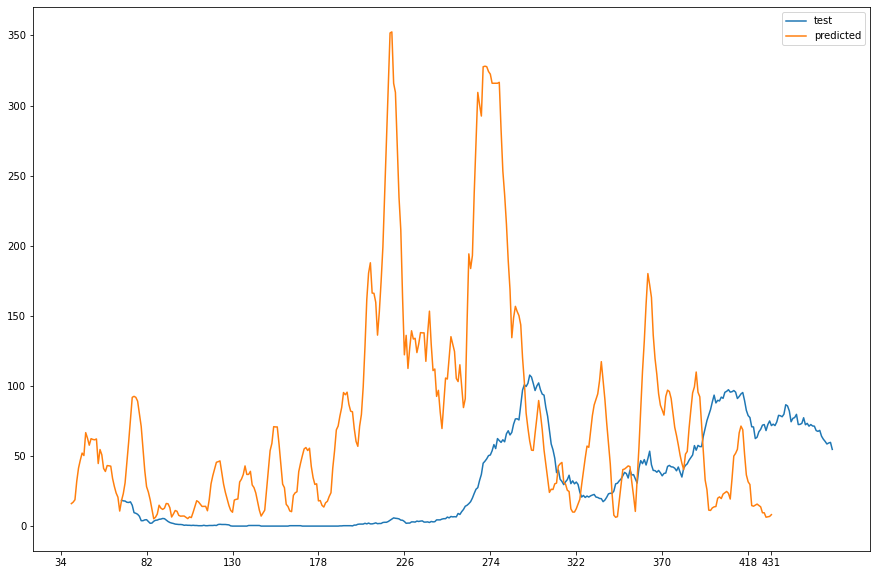

MAE 58.976
RMSE 88.114
MAD 39.465
R2 -6.089
MAPE 1.138
MAXAPE 9.944
TAPE 407.494


In [146]:
X_test = np.array(X_trains[-2]).reshape(-1, 1) 


y_test =  y_trains[-2]

y_pred = regr.predict(X_test)

for k, v in evaluate(y_test, y_pred).items():
    print('%s %.3f' % (k, v))
y_pred = pd.Series(y_pred).rolling(window=7).mean()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'test')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.xticks(tickslocs, tickslabels)
plt.show()


for k, v in evaluate(y_test[6:], y_pred[6:]).items():
    print('%s %.3f' % (k, v))

### Forecasting

In [147]:
len(y_tests[0])

28

In [148]:

tickslocs = []
tickslabels = []
for i,e in enumerate(list(y_tests[0].index)):
    if i%9 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2021-04-21', '2021-04-30', '2021-05-09', '2021-05-18', '2021-05-18']

In [149]:
provinceTags

['PI', 'PO', 'LI', 'FI', 'AR', 'PT', 'GR', 'MS', 'SI', 'LU']

MAE 54.438
RMSE 60.196
MAD 60.624
R2 -4.151
MAPE 16.023
MAXAPE 118.677
TAPE 448.640


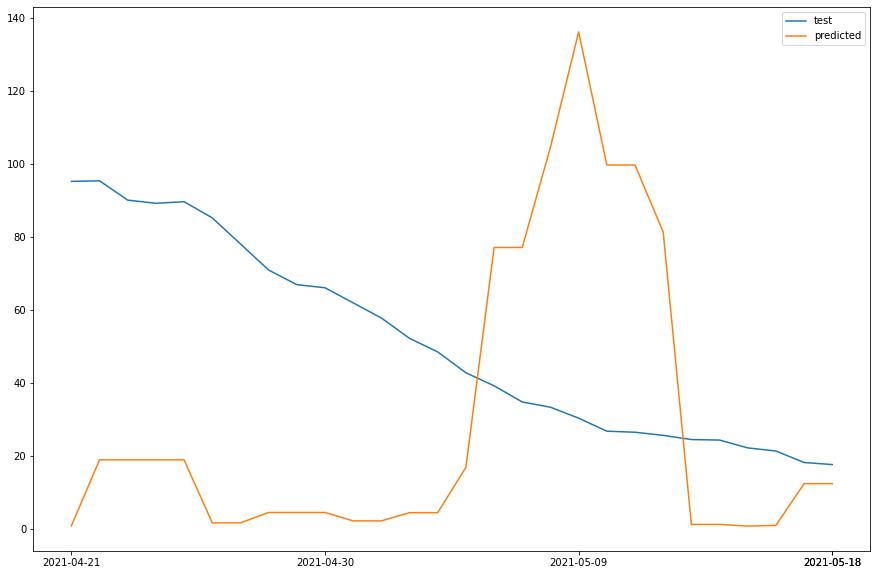

MAE 48.085

RMSE 54.249

MAD 51.650

R2 -7.426

MAPE 11.939

MAXAPE 47.577

TAPE 262.649

MAE 43.602
RMSE 48.826
MAD 35.692
R2 -6.935
MAPE 15.381
MAXAPE 156.328
TAPE 430.659


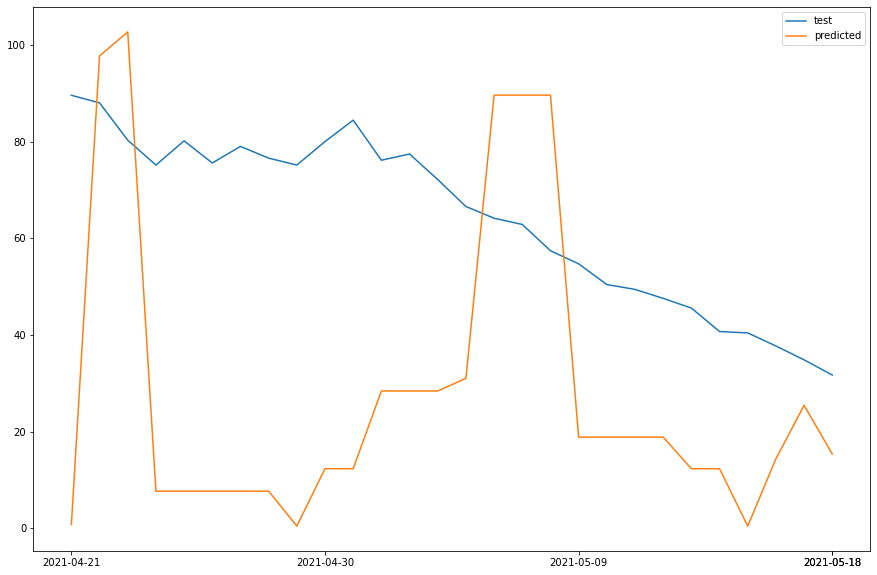

MAE 40.556

RMSE 44.656

MAD 34.386

R2 -6.415

MAPE 13.240

MAXAPE 156.328

TAPE 291.281

MAE 28.552
RMSE 37.094
MAD 25.019
R2 -7.385
MAPE 2.420
MAXAPE 29.684
TAPE 67.771


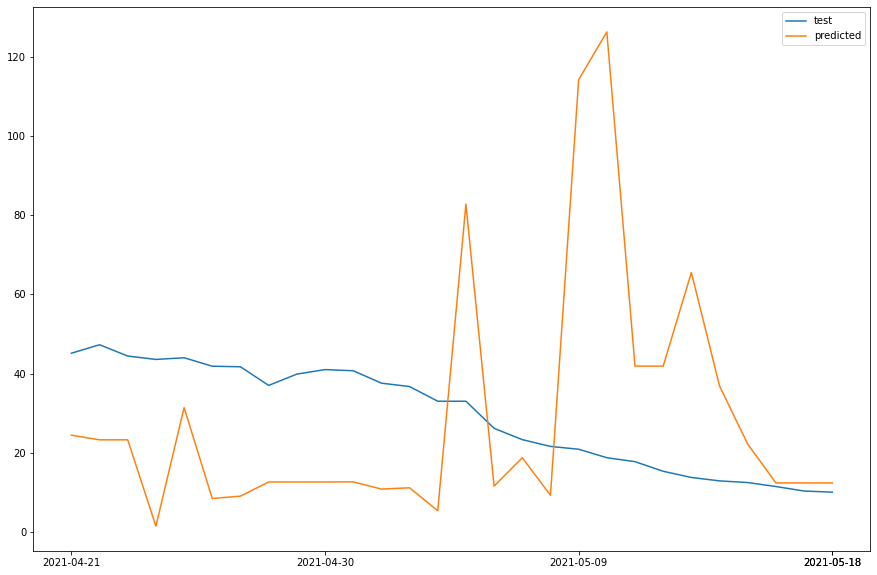

MAE 29.329

RMSE 39.321

MAD 26.107

R2 -10.944

MAPE 1.405

MAXAPE 5.221

TAPE 30.901

MAE 85.826
RMSE 100.044
MAD 104.303
R2 -4.930
MAPE 3.001
MAXAPE 9.546
TAPE 84.018


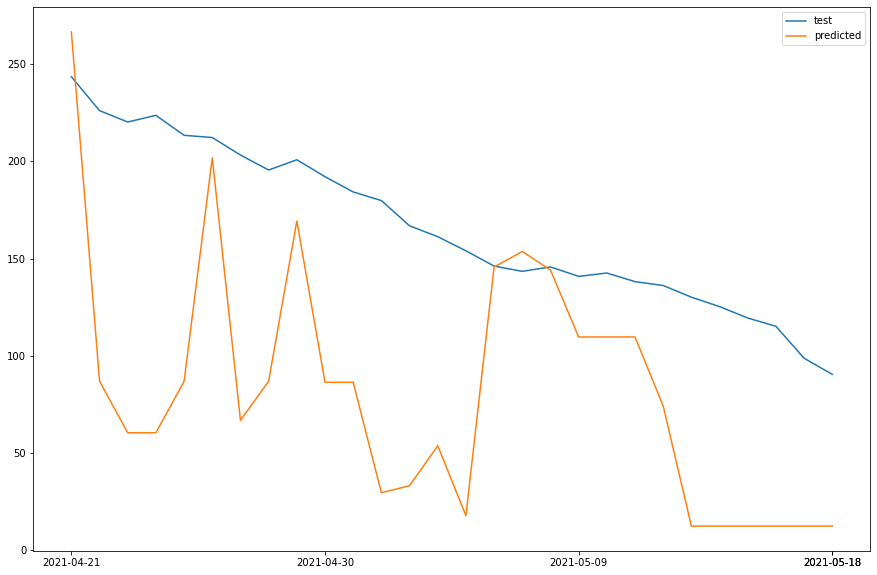

MAE 80.932

RMSE 93.402

MAD 100.374

R2 -7.865

MAPE 3.430

MAXAPE 9.546

TAPE 75.464

MAE 52.899
RMSE 56.084
MAD 59.874
R2 -12.387
MAPE 22.969
MAXAPE 239.261
TAPE 643.131


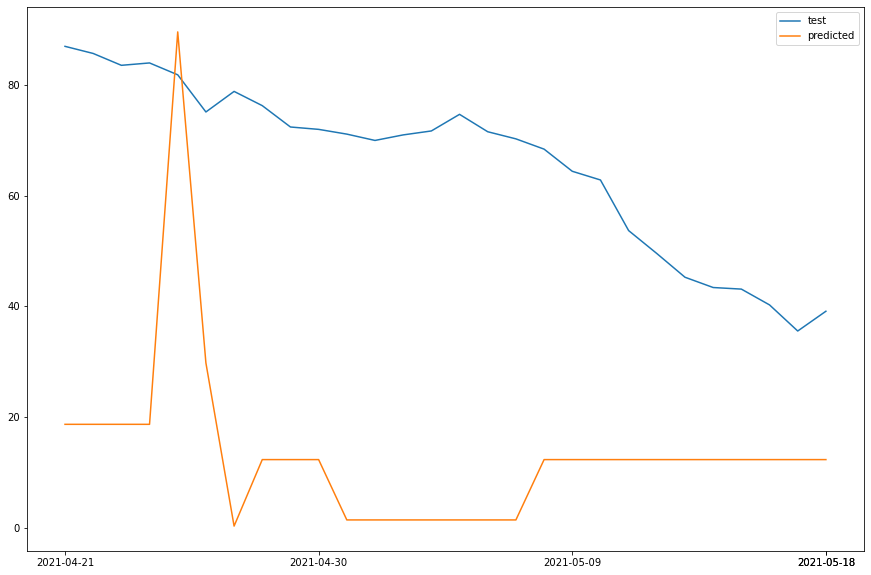

MAE 52.849

RMSE 55.733

MAD 57.874

R2 -15.003

MAPE 28.515

MAXAPE 239.261

TAPE 627.339

MAE 41.984
RMSE 47.132
MAD 40.137
R2 -5.945
MAPE 11.312
MAXAPE 106.752
TAPE 316.737


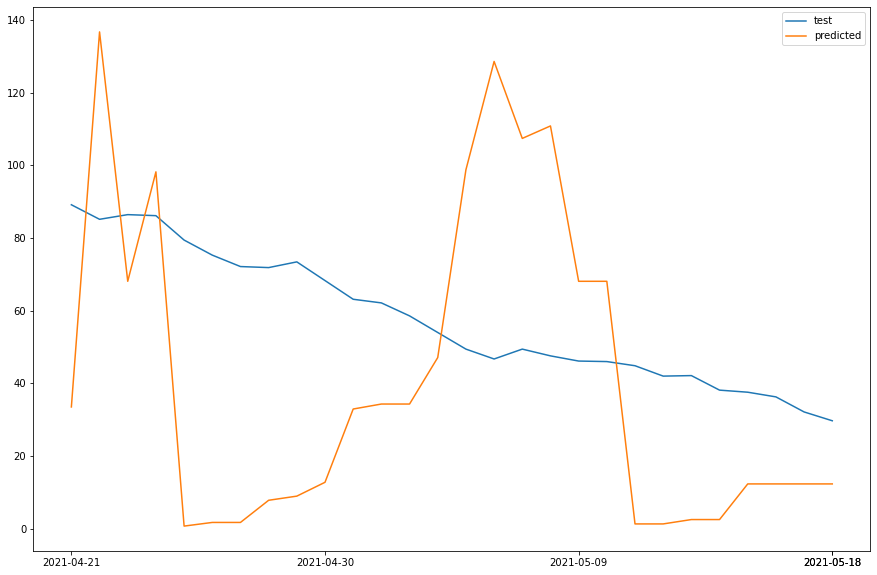

MAE 40.261

RMSE 44.906

MAD 37.608

R2 -11.093

MAPE 7.515

MAXAPE 40.416

TAPE 165.336

MAE 19.384
RMSE 20.066
MAD 21.526
R2 -74.169
MAPE 17.115
MAXAPE 46.869
TAPE 479.227


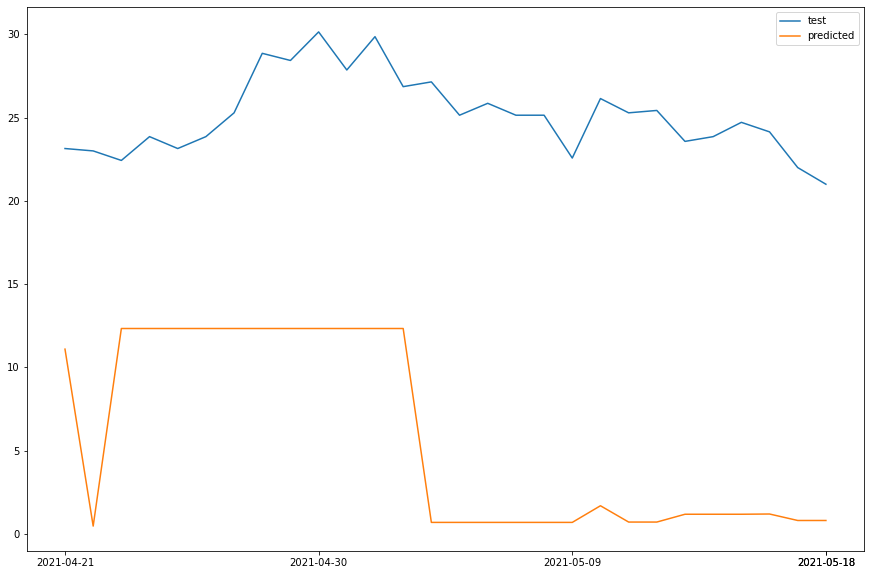

MAE 21.103

RMSE 21.467

MAD 22.523

R2 -82.836

MAPE 19.442

MAXAPE 37.646

TAPE 427.714

MAE 13.120
RMSE 15.374
MAD 12.445
R2 -1.909
MAPE 1.204
MAXAPE 4.165
TAPE 33.708


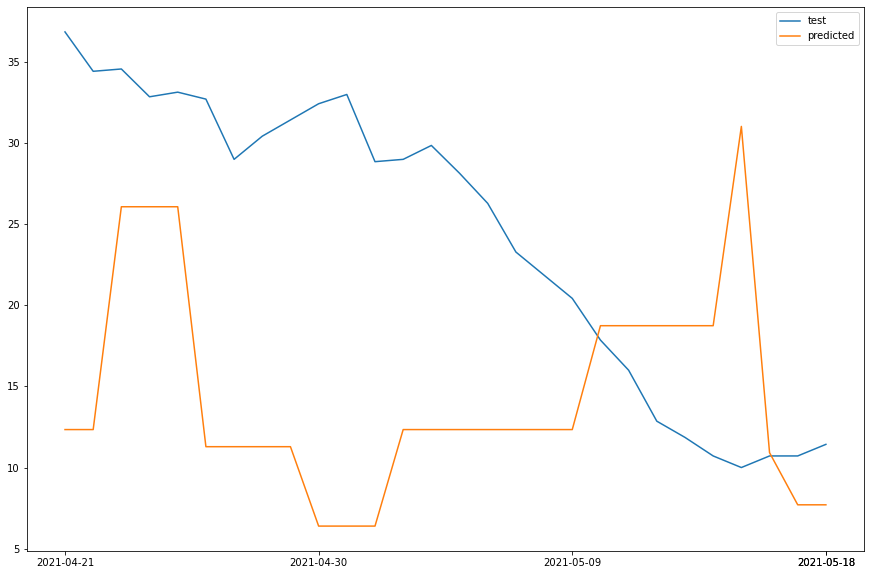

MAE 12.591

RMSE 14.926

MAD 12.445

R2 -2.201

MAPE 1.235

MAXAPE 4.165

TAPE 27.176

MAE 36.035
RMSE 42.009
MAD 34.113
R2 -9.086
MAPE 11.159
MAXAPE 52.838
TAPE 312.461


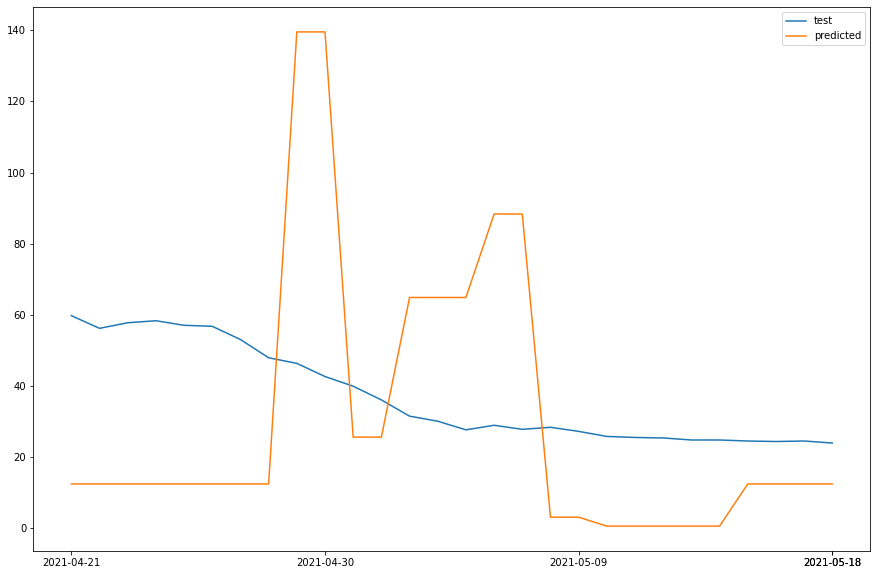

MAE 33.521

RMSE 41.074

MAD 25.094

R2 -21.627

MAPE 13.203

MAXAPE 52.838

TAPE 290.457

MAE 29.257
RMSE 35.232
MAD 25.548
R2 -3.682
MAPE 3.884
MAXAPE 17.048
TAPE 108.749


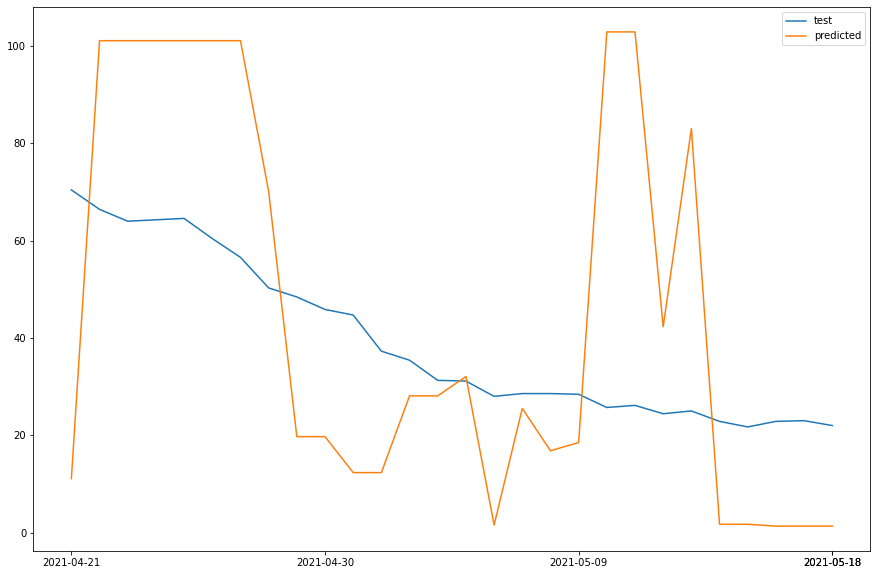

MAE 26.094

RMSE 33.244

MAD 21.337

R2 -9.626

MAPE 4.617

MAXAPE 17.048

TAPE 101.567



In [151]:
regrpreds = list()
regrweights = list()
for X,y in zip(X_tests,y_tests):
    X_test = np.array(X[:len(y)]).reshape(-1, 1) 
    y_test = y
    y_pred = regr.predict(X_test)
    
    for k, v in evaluate(y_test, y_pred).items():
        print('%s %.3f' % (k, v))

    
    regrpreds.append(y_pred)
    regrweights.append(mean_absolute_error(y_test, y_pred))
    plt.figure(figsize=(15,10))
    plt.plot(y_test,label = 'test')
    plt.plot(y_pred, label='predicted')
    plt.legend()
    plt.xticks(tickslocs, tickslabels)
    plt.show()


    for k, v in evaluate(y_test[6:], y_pred[6:]).items():
        print('%s %.3f' % (k, v))
        print()

#### Exponential Smoothing

In [152]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

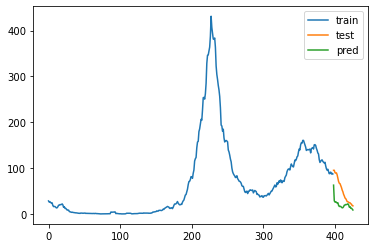

MAE 31.225
RMSE 38.226
MAD 29.656
R2 -1.077
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


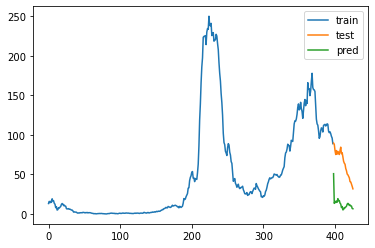

MAE 51.195
RMSE 53.475
MAD 57.163
R2 -8.518
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


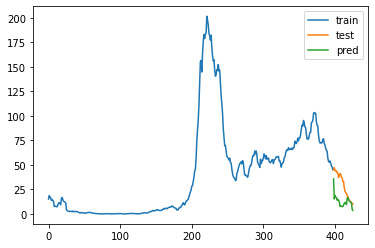

MAE 16.705
RMSE 20.571
MAD 19.166
R2 -1.579
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


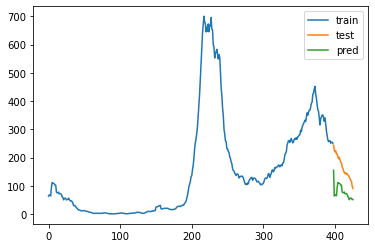

MAE 88.005
RMSE 93.299
MAD 79.016
R2 -4.157
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


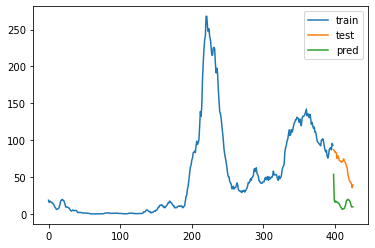

MAE 51.089
RMSE 53.441
MAD 60.098
R2 -11.155
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


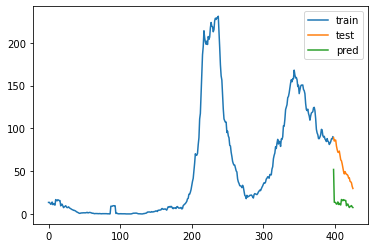

MAE 44.088
RMSE 46.899
MAD 36.869
R2 -5.876
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


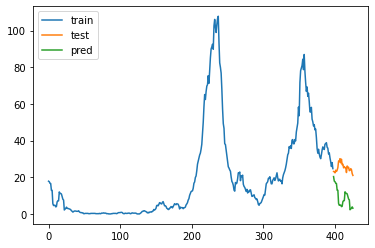

MAE 16.204
RMSE 17.457
MAD 17.599
R2 -55.897
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


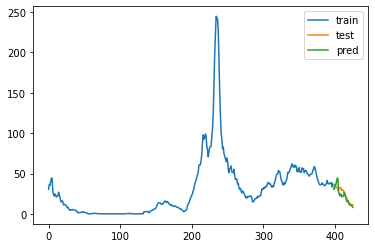

MAE 4.465
RMSE 5.788
MAD 3.393
R2 0.588
MAPE nan
MAXAPE nan
TAPE 0.000


C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


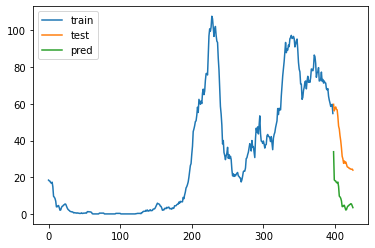

C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MAE 27.832
RMSE 28.774
MAD 25.910
R2 -3.732
MAPE nan
MAXAPE nan
TAPE 0.000


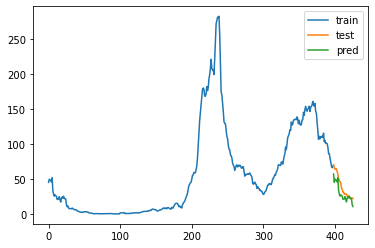

MAE 9.837
RMSE 11.741
MAD 10.164
R2 0.480
MAPE nan
MAXAPE nan
TAPE 0.000


In [155]:
preds= list()
predsweights = list()
for train,test in zip(y_trains,y_tests):
    smoothing_level = 0.1
    ses = ARIMA(train, order=(1,0,0)).fit()
    pred = ses.predict(start=0, end=27)
    
    preds.append(pred)
    predsweights.append(mean_absolute_error(y_test, y_pred))
    
    plt.plot(range(len(train)), train, label='train')
    plt.plot(range(len(train), len(train)+len(test)), test, label='test')
    plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
    plt.legend()
    plt.show()

    for k, v in evaluate(test, pred).items():
        print('%s %.3f' % (k, v))

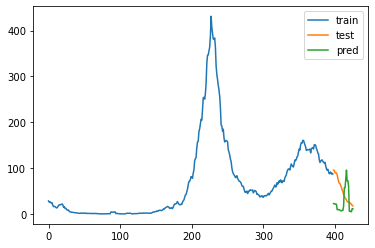

MAE 44.478
RMSE 49.625
MAD 45.711
R2 -2.500
MAPE 3.489
MAXAPE 8.109
TAPE 97.684


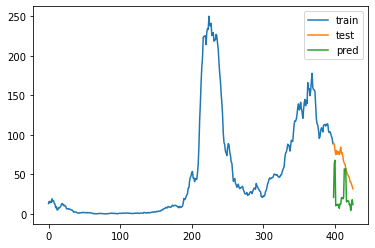

MAE 41.672
RMSE 47.205
MAD 37.827
R2 -6.417
MAPE 3.283
MAXAPE 9.634
TAPE 91.921


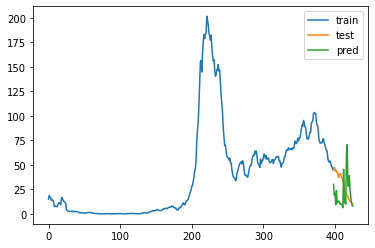

MAE 20.921
RMSE 24.222
MAD 23.615
R2 -2.575
MAPE 1.445
MAXAPE 4.172
TAPE 40.466


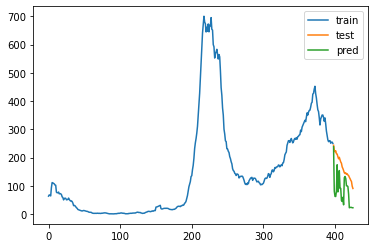

MAE 84.606
RMSE 95.741
MAD 94.815
R2 -4.431
MAPE 1.833
MAXAPE 4.912
TAPE 51.338


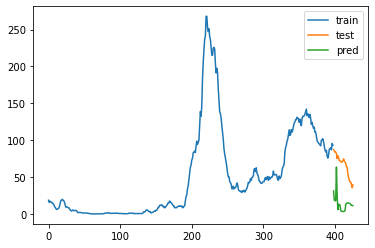

MAE 51.898
RMSE 54.592
MAD 57.734
R2 -11.684
MAPE 7.235
MAXAPE 21.594
TAPE 202.585


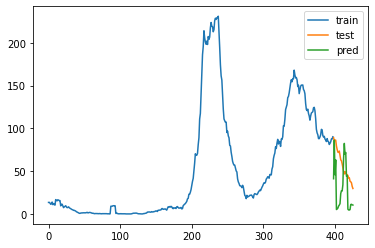

MAE 34.607
RMSE 39.872
MAD 34.061
R2 -3.970
MAPE 3.598
MAXAPE 14.480
TAPE 100.744


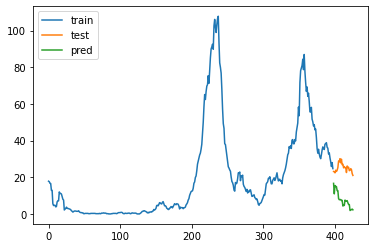

MAE 17.471
RMSE 18.177
MAD 19.319
R2 -60.687
MAPE 3.705
MAXAPE 11.907
TAPE 103.729


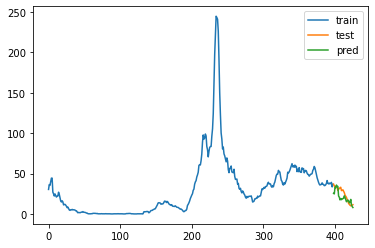

MAE 5.804
RMSE 7.263
MAD 4.055
R2 0.351
MAPE 0.309
MAXAPE 0.869
TAPE 8.648


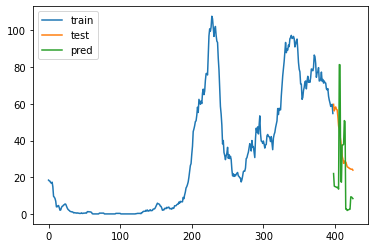

MAE 26.125
RMSE 28.443
MAD 23.143
R2 -3.624
MAPE 3.684
MAXAPE 12.800
TAPE 103.151


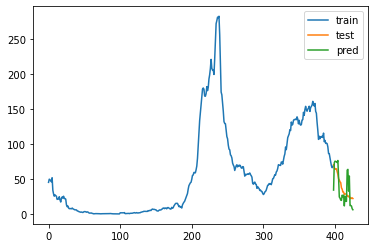

MAE 15.578
RMSE 18.447
MAD 11.472
R2 -0.284
MAPE 0.690
MAXAPE 2.702
TAPE 19.312


In [159]:
for i in range(len(X_trains)):
    regr = regrpreds[i]
    forecast = preds[i]
    test = y_tests[i]
    train = y_trains[i]
    regrw = regrweights[i]
    forecastw = predsweights[i]
    norma = regrw + forecastw
    rw = regrw / norma
    fw = forecastw/ norma
    pred = [(n*rw +m*fw) for n,m in zip(regr,forecast)]
    
    plt.plot(range(len(train)), train, label='train')
    plt.plot(range(len(train), len(train)+len(test)), test, label='test')
    plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
    plt.legend()
    plt.show()

    for k, v in evaluate(test, pred).items():
        print('%s %.3f' % (k, v))

In [158]:
regrw

29.256756195335274